### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


In [2]:
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [3]:
url = "https://covid19.ncdc.gov.ng/"
page = requests.get(url).text
# Initializing the BeautifulSoup package with the specific parser
soup = BeautifulSoup(page, 'lxml')
print(soup)


<!DOCTYPE html>
<html lang="en">
<head><meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<title>NCDC Coronavirus COVID-19 Microsite</title>
<!--[if lt IE 11]>
    	<script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
    	<script src="https://oss.maxcdn.com/libs/respond.js/1.4.2/respond.min.js"></script>
    	<![endif]-->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, user-scalable=0, minimal-ui" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="" name="description"/>
<meta content="" name="keywords"/>
<meta content="Codedthemes" name="author"/>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(

In [4]:
table = soup.find("table", id="custom1")

# Getting the Table header names 

table_headers = table.thead.findAll("tr")
for k in range(len(table_headers)):
    data = table_headers[k].find_all("th")
    column_names = [j.string.strip() for j in data]
    
print(column_names)

['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']


In [5]:
# Extracting the keys ('States Affected' column) and the Values from the table using the <td> tag
values = []
keys = []
table_data = table.tbody.findAll('tr')
for k in range(len(table_data)):
    key = table_data[k].find_all("td")[0].string.strip()
    keys.append(key)
    value = [j.string.strip() for j in table_data[k].find_all("td")]
    values.append(value)
    
# Creating an enumerated dictionary object to create our dataframe
dataframe_dict = dict(enumerate(values))
dataframe_dict

{0: ['Lagos', '57,924', '495', '56,990', '439'],
 1: ['FCT', '19,703', '459', '19,080', '164'],
 2: ['Plateau', '9,030', '6', '8,967', '57'],
 3: ['Kaduna', '8,984', '42', '8,877', '65'],
 4: ['Rivers', '6,986', '36', '6,849', '101'],
 5: ['Oyo', '6,838', '209', '6,506', '123'],
 6: ['Edo', '4,892', '8', '4,699', '185'],
 7: ['Ogun', '4,620', '0', '4,571', '49'],
 8: ['Kano', '3,924', '21', '3,793', '110'],
 9: ['Ondo', '3,226', '1,083', '2,080', '63'],
 10: ['Kwara', '3,120', '251', '2,814', '55'],
 11: ['Delta', '2,615', '800', '1,744', '71'],
 12: ['Osun', '2,547', '29', '2,466', '52'],
 13: ['Nasarawa', '2,378', '1,992', '373', '13'],
 14: ['Enugu', '2,259', '257', '1,973', '29'],
 15: ['Katsina', '2,097', '14', '2,049', '34'],
 16: ['Gombe', '2,034', '4', '1,986', '44'],
 17: ['Ebonyi', '2,008', '11', '1,965', '32'],
 18: ['Anambra', '1,909', '64', '1,826', '19'],
 19: ['Akwa Ibom', '1,794', '81', '1,699', '14'],
 20: ['Abia', '1,677', '11', '1,645', '21'],
 21: ['Imo', '1,655', '

In [6]:
#convert to dataframe
df_ncdc = pd.DataFrame(dataframe_dict).T
df_ncdc.columns = column_names
df_ncdc.head()


,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"57,924",495,"56,990",439
1,FCT,"19,703",459,"19,080",164
2,Plateau,"9,030",6,"8,967",57
3,Kaduna,"8,984",42,"8,877",65
4,Rivers,"6,986",36,"6,849",101


### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [7]:
# Using the raw user github user content
confd = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

recov = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [8]:
df_globalconfd = pd.read_csv(confd)
df_globalconfd.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242


In [9]:
df_globalrecov = pd.read_csv(recov)
df_globalrecov.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,51550,51788,51798,51802,51885,51902,51928,51940,51956,51961
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,91271,91875,92500,93173,93842,94431,95035,95600,96129,96672
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,81538,81632,81729,81813,81896,81994,82096,82192,82289,82392
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11315,11365,11401,11428,11474,11523,11570,11616,11692,11732
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20493,20508,20867,20871,20879,21452,21489,21545,21557,21589


In [10]:
df_globaldeath = pd.read_csv(death)
df_globaldeath.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,51550,51788,51798,51802,51885,51902,51928,51940,51956,51961
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,91271,91875,92500,93173,93842,94431,95035,95600,96129,96672
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,81538,81632,81729,81813,81896,81994,82096,82192,82289,82392
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11315,11365,11401,11428,11474,11523,11570,11616,11692,11732
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20493,20508,20867,20871,20879,21452,21489,21545,21557,21589


### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [11]:
df_statesbudget = pd.read_csv("Budget data.csv")
df_statesbudget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [12]:
df_external = pd.read_csv('covid_external.csv')
df_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [13]:
df_gdp = pd.read_csv('RealGDP.csv')
df_gdp.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [14]:
df_globalconfd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 448 entries, Province/State to 4/9/21
dtypes: float64(2), int64(444), object(2)
memory usage: 959.1+ KB


In [15]:
df_globalrecov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Columns: 448 entries, Province/State to 4/9/21
dtypes: float64(2), int64(444), object(2)
memory usage: 906.6+ KB


In [16]:
df_globaldeath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Columns: 448 entries, Province/State to 4/9/21
dtypes: float64(2), int64(444), object(2)
memory usage: 906.6+ KB


In [17]:
df_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [18]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [19]:
df_statesbudget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [20]:
df_ncdc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [21]:
type(df_ncdc)

pandas.core.frame.DataFrame

In [22]:
# Rename the columns of NCDC data

df_ncdc.rename(columns={'States Affected': 'States', 
                            'No. of Cases (Lab Confirmed)': 'Confirmed', 
                                'No. of Cases (on admission)': 'Admitted',
                                 'No. Discharged':'Recovered', 
                                 'No. of Deaths':'Death'}, inplace= True)

df_ncdc.head()

,States,Confirmed,Admitted,Recovered,Death
0,Lagos,"57,924",495,"56,990",439
1,FCT,"19,703",459,"19,080",164
2,Plateau,"9,030",6,"8,967",57
3,Kaduna,"8,984",42,"8,877",65
4,Rivers,"6,986",36,"6,849",101


In [23]:
# Remove the commas in confirmed, a and recovered columns

df_ncdc['Confirmed'] = df_ncdc['Confirmed'].apply(lambda x: x.replace(',', ''))
df_ncdc['Recovered'] = df_ncdc['Recovered'].apply(lambda x: x.replace(',', ''))
df_ncdc['Admitted'] = df_ncdc['Admitted'].apply(lambda x: x.replace(',', ''))


df_ncdc

,States,Confirmed,Admitted,Recovered,Death
0,Lagos,57924,495,56990,439
1,FCT,19703,459,19080,164
2,Plateau,9030,6,8967,57
3,Kaduna,8984,42,8877,65
4,Rivers,6986,36,6849,101
5,Oyo,6838,209,6506,123
6,Edo,4892,8,4699,185
7,Ogun,4620,0,4571,49
8,Kano,3924,21,3793,110
9,Ondo,3226,1083,2080,63


In [24]:
# Convert the Confirmed	,Admitted, Recovered and Death columns to int64 from object

df_ncdc['Confirmed'] = df_ncdc['Confirmed'].astype('int')
df_ncdc['Recovered'] = df_ncdc['Recovered'].astype('int')
df_ncdc['Admitted'] = df_ncdc['Admitted'].astype('int')
df_ncdc['Death'] = df_ncdc['Death'].astype('int')

df_ncdc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   States     37 non-null     object
 1   Confirmed  37 non-null     int32 
 2   Admitted   37 non-null     int32 
 3   Recovered  37 non-null     int32 
 4   Death      37 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 1.2+ KB


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [67]:
# Get Daily confirmed cases for nigeria from df_globalconfd
#dailyconfd_ng = df_globalconfd[df_globalconfd['Country/Region'] == 'Nigeria']
dailyconfd_ng = df_globalconfd.loc[df_globalconfd['Country/Region'] == 'Nigeria']
dailyconfd_ng.drop(['Lat', 'Long', 'Province/State'], axis = 1,inplace = True)
dailyconfd_ng

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
199,Nigeria,0,0,0,0,0,0,0,0,0,...,162891,162997,163063,163113,163195,163330,163388,163498,163581,163652


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [69]:
# Get Daily recovered cases for nigeria from df_globalrecov
dailyrecov_ng = df_globalrecov.loc[df_globalrecov['Country/Region'] == 'Nigeria']
dailyrecov_ng.drop(['Lat', 'Long', 'Province/State'], axis = 1,inplace = True)
dailyrecov_ng

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
184,Nigeria,0,0,0,0,0,0,0,0,0,...,151648,151708,151835,151853,151998,152045,153630,153788,154005,154073


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [70]:
# Get Daily death cases for nigeria from df_globaldeath
dailydeath_ng = df_globaldeath.loc[df_globaldeath['Country/Region'] == 'Nigeria']
dailydeath_ng.drop(['Lat', 'Long', 'Province/State'], axis = 1,inplace = True)
dailydeath_ng

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
184,Nigeria,0,0,0,0,0,0,0,0,0,...,151648,151708,151835,151853,151998,152045,153630,153788,154005,154073


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

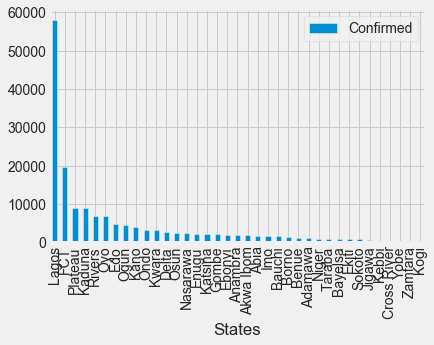

In [30]:
# Bar chart showing the number of confirmed cases in Nigeria 
df_ncdc.plot(x = 'States', y = 'Confirmed', kind = 'bar')

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

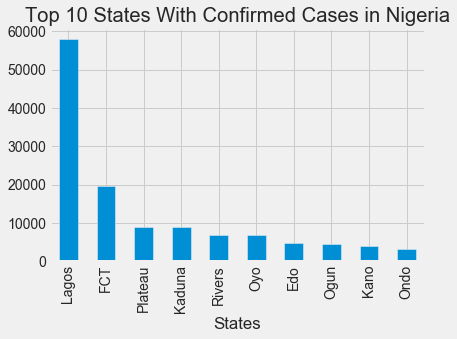

In [50]:
# sort the states in respect to confirmed cases in descending order
top10states_confd = df_ncdc.sort_values(by = 'Confirmed', ascending=False ).head(10)
top10states_confd

# Plot the barchart
top10states_confd.plot(x= 'States', y = 'Confirmed', kind = 'bar', title= 'Top 10 States With Confirmed Cases in Nigeria', legend = None)
plt.show()


TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

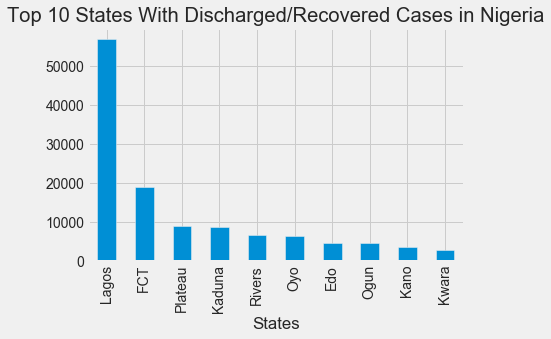

In [49]:
#Top 10 states in terms of discharge
top10states_recov = df_ncdc.sort_values(by = 'Recovered', ascending=False ).head(10)
top10states_recov

# Plot the barchart
top10states_recov.plot(x= 'States', y = 'Recovered', kind = 'bar',title= 'Top 10 States With Discharged/Recovered Cases in Nigeria', legend = None)
plt.show()


TODO D - Plot the top 10 Death cases

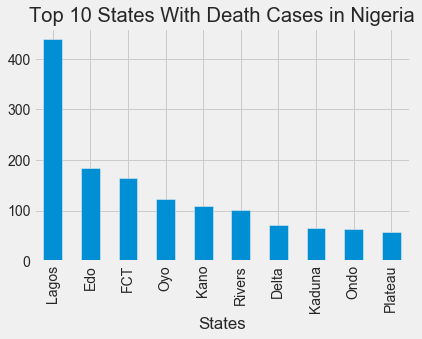

In [48]:
#Top 10 states in terms of death
top10states_death = df_ncdc.sort_values(by = 'Death', ascending=False ).head(10)
top10states_death

# Plot the barchart
top10states_death.plot(x= 'States', y = 'Death', kind = 'bar',title= 'Top 10 States With Death Cases in Nigeria', legend = None)
plt.show()

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [80]:
# Using dailyconfd_ng, dailyrecov_ng, dailydeath_ng to create a line plot  of the total daily confirmed, recovered and death cases in Nigeria
#dailyconfd_ng.plot(kind = 'line', x = dailyconfd_ng.columns)
#plt.show()


TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data